In [13]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
## Data Import
df = pd.read_csv(join('data','iris.csv'))
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
## Remove columns we do not use in this example
del df['Id']
del df['Species']
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
## Same functions to explore data
print(df.corr())
print()
print(df.dtypes)
print()
print(df.shape)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

(150, 4)


In [17]:
## Train-Valiedation Split
## Index control by yourself

n_data = df.shape[0]
p_trn = 0.7
n_trn = round(n_data * p_trn)
n_tst = n_data - n_trn
print(n_data, n_trn, n_tst)

idx_data = pd.Series(range(0,150))
idx_data_perm = np.random.permutation(idx_data)
print(idx_data_perm)

idx_trn = idx_data_perm[0:n_trn]
idx_tst = idx_data_perm[n_trn:n_data]
print(len(idx_trn),len(idx_tst))

# Train:Test = 7:3으로 맞춰주기위해 수동으로 작업을 해줌
# 우선 Train Test의 개수를 계산한 후
# Random Permutation을 통해
# index를 계산해줌

150 105 45
[ 25  99  90 110   6 130 118 123 144 120 145   3 140  89  92  13 134 142
   0  17 119 126  52  75  60  76  29  54  48  87  64 138  41  21 141  23
 147 137  16  59 139 146  45 108 105 112 100  37  70  65  32 103  67  20
  57  47  28 109 133  72   2  30  31  95  19  24 116 111  42 136  71  22
 101  36 107  69 104 106 131  84  77   1  12 149  55  80 128  98  94  33
 102  40   7  61  27 148  49  15 115 125 127  10  73 132 124  38 113 117
  46  66  44  74  35   5  11   8  34  58  68  93  56 129  81   4  43 143
  26  96 121  86  18  91  63  39  82  62  83   9  88  78  85  97  79  53
 122 135  14 114  51  50]
105 45


In [18]:
# 계산된 index에 맞춰 데이터 분할
trnx = df.iloc[idx_trn,0:3]
trny = df.iloc[idx_trn,3]
tstx = df.iloc[idx_tst,0:3]
tsty = df.iloc[idx_tst,3]

In [19]:
# 혹은 scikit learn에서 제공해주는 함수를 사용할 수도 있음
## )r you can use just this 
from sklearn.model_selection import train_test_split

trnx, tstx, trny, tsty = train_test_split(df.iloc[:,0:3], df.iloc[:,3], test_size=0.3, random_state=123)

In [20]:
# Resgression Learning
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
print(lr_pred)

[1.55082809 1.88707017 1.99246785 1.43328554 0.21474604 1.71295854
 1.22046352 0.26422937 0.2364671  1.514382   1.66814449 0.30495491
 1.3459842  1.96624119 1.97975798 2.13134163 0.05673136 0.12535558
 1.60393614 0.15850432 0.16333728 1.74369079 0.54406604 1.74160168
 0.41018891 0.27565704 0.16559008 1.81835622 2.53074751 0.27131513
 2.00373184 1.60223684 0.35015878 0.2173262  1.05190204 0.95816968
 2.31286639 0.41364995 0.19351603 1.18764216 0.98544089 0.05085384
 2.16240125 1.74836007 1.84804391]


In [21]:
# 성능계산(RMSE)
## Calculation of RMSE
np.sqrt(np.mean((np.square(lr_pred - tsty))))

0.20240684385048952

[83.50861963]


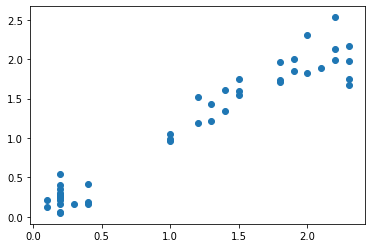

In [22]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred)
print(np.correlate(tsty, lr_pred))

In [23]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred,tsty)))
print('R2:',metrics.r2_score(tsty, lr_pred))
# Scikit learn 안에도 metrics 패키지 밑에 다양한 미리 구현된 성능 지표가 있음

RMSE: 0.20240684385048957
R2: 0.9372028808296338


In [24]:
# Lasso나 Ridge같은 variation도 잘 구현이 되어 있음
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso,tsty)))

from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge,tsty)))

print(model.coef_, model_lasso.coef_, model_ridge.coef_)

RMSE: 0.686885179496829
RMSE: 0.19777498377950506
[-0.26390341  0.27598582  0.5503348 ] [ 0.         -0.          0.07060096] [-0.21302275  0.22775841  0.52289572]


In [25]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
print(lr_pred_lasso)

[1.30646731 1.34882788 1.35588798 1.24998654 1.06642404 1.29940721
 1.27116683 1.05230385 1.05936395 1.27116683 1.3205875  1.05936395
 1.23586635 1.34882788 1.39118846 1.37000817 1.05230385 1.03818366
 1.29234711 1.05936395 1.05936395 1.3205875  1.09466443 1.30646731
 1.07348414 1.08054423 1.06642404 1.30646731 1.43354903 1.05936395
 1.39118846 1.3135274  1.07348414 1.05936395 1.24292644 1.19350577
 1.41236875 1.08054423 1.05230385 1.23586635 1.20762596 1.04524375
 1.37706827 1.32764759 1.3205875 ]


In [26]:
np.sqrt(np.mean((np.square(lr_pred_lasso - tsty))))

0.686885179496829

[65.89187782]


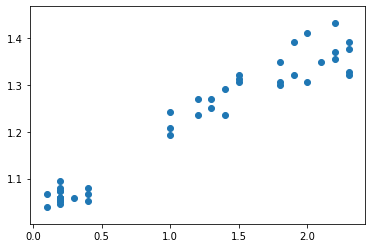

In [27]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_lasso)
print(np.correlate(tsty, lr_pred_lasso))

In [28]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso,tsty)))
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred_lasso))
print('R2:',metrics.r2_score(tsty, lr_pred_lasso))

RMSE: 0.686885179496829
MAE: 0.6107367755831609
R2: 0.27680131642563643


In [29]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print(lr_pred_ridge)

[1.57011522 1.89122048 1.98316747 1.41479377 0.22715666 1.69561168
 1.26311568 0.25186473 0.23582678 1.5018614  1.68353576 0.29758769
 1.3270962  1.95512731 2.01323744 2.11199602 0.08586723 0.12303618
 1.59924399 0.17339352 0.17928779 1.74302189 0.52594475 1.72659897
 0.39627257 0.29355196 0.18897281 1.78755867 2.50918161 0.26744402
 2.03159259 1.61798409 0.34482663 0.22336591 1.09508837 0.96485996
 2.30970834 0.40743116 0.19827287 1.19928256 1.00111158 0.07176151
 2.14593045 1.75565404 1.82675742]


In [30]:
np.sqrt(np.mean((np.square(lr_pred_ridge - tsty))))

0.19777498377950503

In [35]:
lr_pred_ridge - tsty

72     0.070115
112   -0.208780
132   -0.216833
88     0.114794
37     0.127157
138   -0.104388
87    -0.036884
42     0.051865
8      0.035827
90     0.301861
141   -0.616464
33     0.097588
59    -0.072904
116    0.155127
135   -0.286763
104   -0.088004
36    -0.114133
13     0.023036
63     0.199244
45    -0.126606
28    -0.020712
133    0.243022
24     0.325945
127   -0.073401
46     0.196273
20     0.093552
31    -0.211027
121   -0.212441
117    0.309182
4      0.067444
130    0.131593
119    0.117984
29     0.144827
0      0.023366
62     0.095088
93    -0.035140
131    0.309708
5      0.007431
16    -0.201727
82    -0.000717
60     0.001112
35    -0.128238
143   -0.154070
145   -0.544346
142   -0.073243
Name: PetalWidthCm, dtype: float64

[83.49885371]


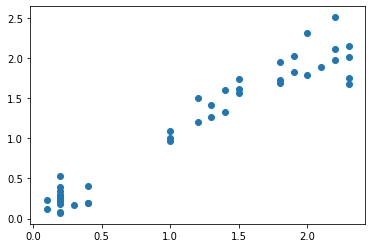

In [31]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_ridge)
print(np.correlate(tsty, lr_pred_ridge))

In [32]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge,tsty)))
#예측값과 실제값이 평균적으로 얼마나 차이있는지 00000000
print('MAE:',metrics.mean_absolute_error(tsty, lr_pred_ridge))
#절댓값
print('R2:',metrics.r2_score(tsty, lr_pred_ridge))

RMSE: 0.19777498377950506
MAE: 0.15044356956345198
R2: 0.940044082943614


In [33]:
print(model.coef_)
print(model_lasso.coef_)
print(model_ridge.coef_)
#회귀계수

[-0.26390341  0.27598582  0.5503348 ]
[ 0.         -0.          0.07060096]
[-0.21302275  0.22775841  0.52289572]


[83.49885371]


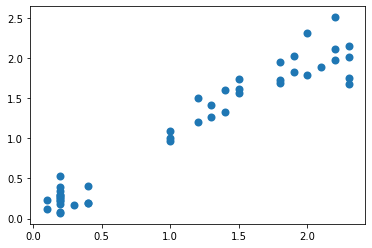

In [34]:
# y vs. y_hat 그림을 통해 시각화 
# Correlation 계산
plt.scatter(x = tsty, y= lr_pred_ridge,  linewidth=2)
print(np.correlate(tsty, lr_pred_ridge))